#Statistic Lab Ex9

*By:\
Ariel Ginensky: 312297559\
Ron Tzidon 315313577\
Shahar Zismanovich 205518905*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import nnls
import plotly.graph_objects as go

In [ ]:
df_21 = pd.read_csv('votes per ballot 2021.csv', encoding = "ISO-8859-8")
df_22 = pd.read_csv('expb.csv')

In [ ]:
df_21 = df_21[df_21.בזב != 0]
df_22 = df_22[df_22.בזב != 0]
party_names_dict = {
    'מחל':'ליכוד'
    ,'פה':'יש עתיד'
    ,'שס':'שס'
    ,'כן':'כחול לבן'
    ,'ב':'ימינה'
    ,'אמת':'עבודה'
    ,'ג':'יהדות התורה'
    ,'ל':' ישראל ביתנו'
    ,'ט':'ציונות דתית'
    ,'ודעם':'משותפת'
    ,'ת':'תקוה חדשה'
    ,'מרצ':'מרצ'
    ,'עם':'רעם'
    ,'רק':'דמוקרטית'
    ,'רף':'עם שלם'
    ,'רנ':'התקווה לשינוי'
    ,'ר':'רפא'
    ,'קץ':'משפט צדק'
    ,'קך':'סדר חדש'
    ,'קי':'שמע'
    ,'ק':'הבלתי אפשרי, אפשרי'
    ,'ץ':'דעם'
    ,'צף':'חץ'
    ,'צכ':'מען (יחד) לעידן חדש'
    ,'צי':'עצמנו עצמאים וליברלים'
    ,'ףז':'הפיראטים'
    ,'נר':'אנחנו'
    ,'ני':'עולם חדש'
    ,'נ':'קידום מעמד הפרט'
    ,'כך':'אני ואתה'
    ,'כ':'הלב היהודי'
    ,'יר':'מנהיגות חברתית'
    ,'יק':'הגוש התנכ״י'
    ,'יף':'כבוד האדם'
    ,'ינ':'ברית השותפות לאיחוד לאומי'
    ,'י':'המפץ החברתי - גימלאים'
    ,'זץ':'צומת - עצמאים, חקלאים, כפרים'
    ,'ז':'הישראלים'
    ,'יז':'הכלכלית'
    ,'זך' : 'קמ"ה'
    ,'ום': 'חד"ש תע"ל'
    ,'ד': 'בל"ד'
    ,'אצ' : 'חופש כלכלי'
    ,'זנ' : 'כח להשפיע'
    ,'ך': 'אני ואתה'
    ,'יץ' : 'צו השעה'
    ,'נק' : 'יש כיוון'
    ,'נץ' : 'העצמאים החדשים'
    ,'נף' : 'מפלגת שמע'
    ,'נז' : 'כבוד האדם'
    ,'קנ' : 'כל קול קובע'
    ,'צ' : 'צעירים בוערים'
    ,'ף' : 'הפיראטים'
    ,'רז' : 'רשימת שלושים\ארבעים'

    }
df_21.rename(columns=party_names_dict,
              inplace=True)
df_22.rename(columns=party_names_dict,
              inplace=True)

large_parties_21 = df_21.sum()[11:].sort_values(ascending=False)[:13].index
large_parties_22 = df_22.sum()[11:].sort_values(ascending=False)[:13].index


large_parties_22

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['ליכוד', 'יש עתיד', 'ציונות דתית', 'כחול לבן', 'שס', 'יהדות התורה',
       ' ישראל ביתנו', 'רעם', 'חד"ש תע"ל', 'עבודה', 'מרצ', 'בל"ד', 'ימינה'],
      dtype='object')

In [ ]:
only_21 = df_21.drop(['כשרים', 'סמל ועדה', 'ברזל', 'סמל '
                                                                     'ישוב'
                     , 'ריכוז', 'בזב', 'מצביעים', 'פסולים',
                             'שופט'], axis=1)
only_22 = df_22.drop(['כשרים', 'סמל ועדה', 'ברזל', 'סמל '
                                                                     'ישוב',
                             'ריכוז', 'בזב', 'מצביעים', 'פסולים',
                             'שופט'], axis=1)


In [ ]:
mut_ballot = pd.merge(only_21,only_22,on = ["שם ישוב", "קלפי"])
del mut_ballot['Unnamed: 50']
mut_ballot =  mut_ballot.drop(['שם ישוב', 'קלפי'], axis=1)
N_a = mut_ballot.iloc[:,:39]
N_b = mut_ballot.iloc[:,39:]

N_a = N_a.filter(regex = '|'.join(large_parties_21.tolist()))
N_b = N_b.filter(regex = '|'.join(large_parties_22.tolist()))


In [ ]:
def Frobenius_norm(m):
    m = m.reshape(13,13)
    return np.linalg.norm(((np.array(N_a) @ m) - np.array(N_b)), 'fro')
m0 = np.zeros((len(N_a.T)*len(N_a.T)))
result = minimize(Frobenius_norm,m0)
m_opt = result.x.reshape((13, 13))

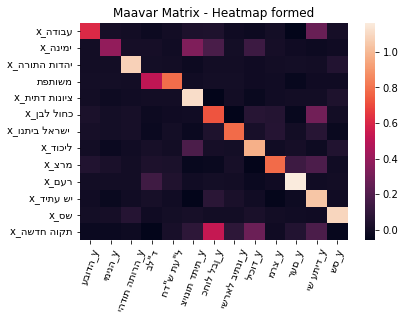

In [ ]:
fig, ax = plt.subplots() #plotting heatmap
f = sns.heatmap(m_opt)
_ = f.set(title='Maavar Matrix - Heatmap formed')
_ = ax.set_xticklabels(N_b.columns.map(lambda x: x))
_ = plt.xticks(rotation=70)
_ = ax.set_yticklabels(N_a.columns.map(lambda x: x[::-1]))
_ = plt.yticks(rotation=0)

# B

Sorry for the wierd location of "העבודה". Just added the name of the party to the dataframe after creating it. Results should still be true.

In [ ]:
m_opt1 = pd.DataFrame(m_opt)
m_opt1 = m_opt1.div(m_opt1.sum(axis=1), axis='rows')

In [ ]:
m_opt1 = m_opt1.where(m_opt1 > 0.05,0)

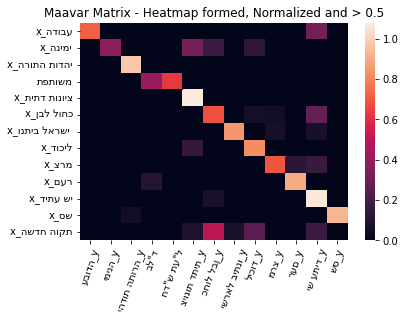

In [ ]:
fig, ax = plt.subplots()
f = sns.heatmap(m_opt1)
_ = f.set(title='Maavar Matrix - Heatmap formed, Normalized and > 0.5')
_ = ax.set_xticklabels(N_b.columns.map(lambda x: x))
_ = plt.xticks(rotation=70)
_ = ax.set_yticklabels(N_a.columns.map(lambda x: x[::-1]))
_ = plt.yticks(rotation=0)

So, we ar noticing a couplr of interesting trends in our heatmap. Firstly, a moving is predicted from Hlikud to Hatziyonut Hadatit, which can explain there strngth in 22'. Moreover, there is a very interesting trnasfer predict from Tikva Hadasha that became a part of Hamachane Hamamlachti after the 21' knesset(כחול לבן במפה). We can see a moving of voters to a range of parties, from left and right. It can indicate a strong structure for a strong center party for the future. We can see some moving from Kahol Lavan to the Likud. A surprising one is the moving of voters from Yamina to Kahol Lavan.

# C

In [ ]:
from scipy.optimize import nnls
import numpy as np
mat_NNLS = []
for i in range(len(N_a.columns)):
    A = np.array(N_a)
    b = np.array(N_b.iloc[:,i])

    x, residuals = nnls(A, b)
    mat_NNLS.append(x)

mat_NNLS = pd.DataFrame(mat_NNLS)
mat_NNLS = mat_NNLS.div(m_opt1.sum(axis=1), axis='rows')
mat_NNLS = mat_NNLS.where(mat_NNLS > 0.05,0)

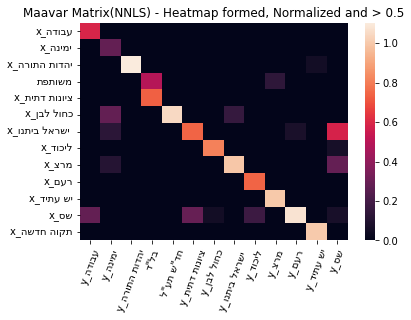

In [ ]:
fig, ax = plt.subplots()

f = sns.heatmap(mat_NNLS)
_ = f.set(title='Maavar Matrix(NNLS) - Heatmap formed, Normalized and > 0.5')
_ = ax.set_xticklabels(N_b.columns.map(lambda x: x[::-1]))
_ = plt.xticks(rotation=70)
_ = ax.set_yticklabels(N_a.columns.map(lambda x: x[::-1]))
_ = plt.yticks(rotation=0)

As one can see, using the NNLS method made a more narrow prediction on the movements between parties. We can tell that the results are less expected than what we got in the least sqauers method, which means, this is a good method to determine the differences and the vote transfers from right, to left! Giving more attention to trends that are not visible from a broad perspective.


##Question 2

In [ ]:
new_df_21 = df_21.drop(['כשרים', 'סמל ועדה', 'ברזל', 'סמל '
                                                                     'ישוב'
                     , 'ריכוז', 'פסולים',
                             'שופט'], axis=1)
new_df_22 = df_22.drop(['כשרים', 'סמל ועדה', 'ברזל', 'סמל '
                                                                     'ישוב',
                             'ריכוז',  'פסולים',
                             'שופט'], axis=1)


In [ ]:
merged_df = pd.merge(new_df_21,new_df_22,on = ["שם ישוב", "קלפי",],suffixes=('_21', '_22'))
del merged_df['Unnamed: 50']
#merged_df =  merged_df.drop(['שם ישוב', 'קלפי'], axis=1)


not_voted_21 = merged_df['בזב_21'] - merged_df['מצביעים_21'] 
not_voted_22 = merged_df['בזב_22'] - merged_df['מצביעים_22']

# Adding new column for N_A,N_b:

N_a['לא הצביעו'] = not_voted_21


N_b['לא הצביעו'] = not_voted_22



In [ ]:
# Finding M*

def Frobenius_norm2(m):
    m = m.reshape(14,14)
    return np.linalg.norm(((np.array(N_a) @ m) - np.array(N_b)), 'fro')

m0 = np.zeros((len(N_a.T)*len(N_a.T)))
result = minimize(Frobenius_norm2,m0)
m2_opt = result.x.reshape((14, 14))


In [ ]:
# Normalize M*:

m_opt2_normed = pd.DataFrame(m2_opt)
m_opt2_normed = m_opt2_normed.div(m_opt2_normed.sum(axis=1), axis='rows')
m_opt2_normed = m_opt2_normed.where(m_opt2_normed > 0.05,0)


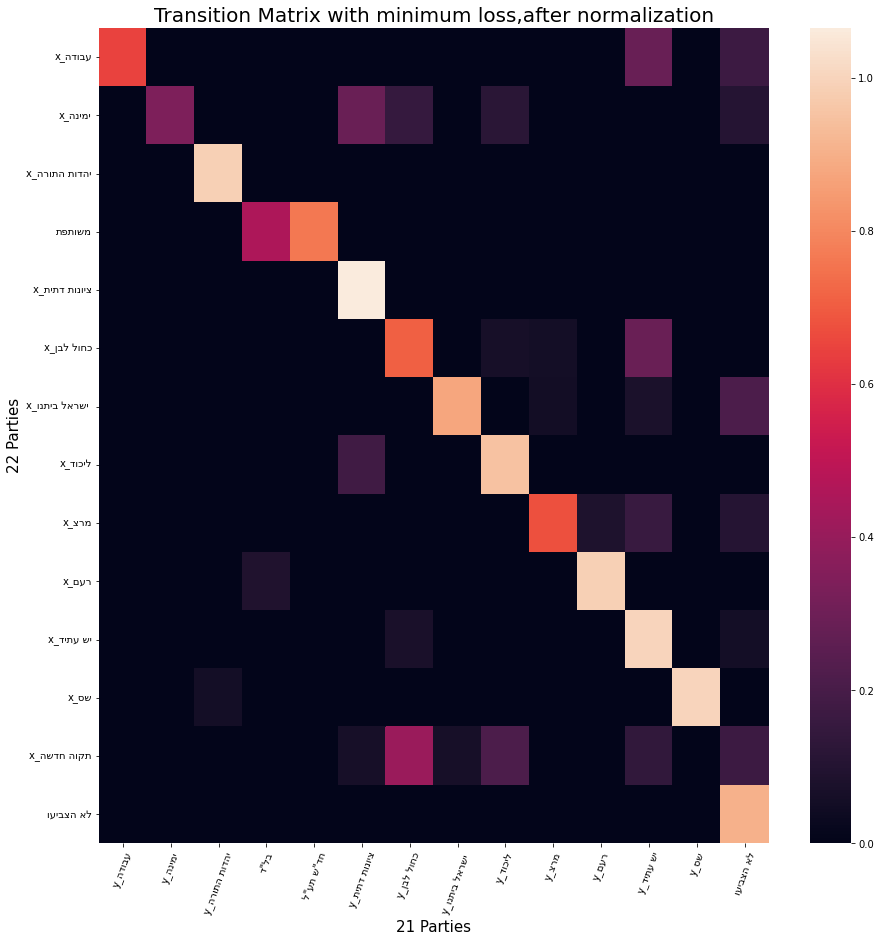

In [ ]:
# Presenting M* with heatmap:

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(m_opt2_normed)
plt.title('Transition Matrix with minimum loss,after normalization',fontsize = 20)
plt.xlabel('21 Parties',fontsize = 15)
plt.ylabel('22 Parties',fontsize = 15)
ax.set_xticklabels(N_b.columns.map(lambda x: x[::-1]))
plt.xticks(rotation=70)
ax.set_yticklabels(N_a.columns.map(lambda x: x[::-1]))
plt.yticks(rotation=0)
plt.show()

**Answear**

As we can see from the heat map above, there wasn't a big change in the number of people whoe didn't vote at all in 2021 conparing to 2022.\
Also, By comparing the heat map from Question 1 (b), to the heat map above, we can see that after adding the column and the row, the vakues of the rest the transition matrix almost did not change at all.\
we can justify it by the following code: 

In [ ]:
m_opt1.subtract(m_opt2_normed.iloc[:-1,:-1]).values.mean()

0.00010332933763162249

we can see that after substarcting the 2 optimal transition martices we found the mean of the differences of the vakues of the 2 matrices is closed to 0.\
so we can conclude that the values in the rest of the matrix had a very small change. 

## Question 3

### a)

In [ ]:
#finding the resiual matrix: 

res = (np.array(N_a) @ m_opt2_normed) - np.array(N_b)

# Calculating Mse for eacg party: 

res_sqr = res**2


mse = res_sqr.mean(axis = 0)


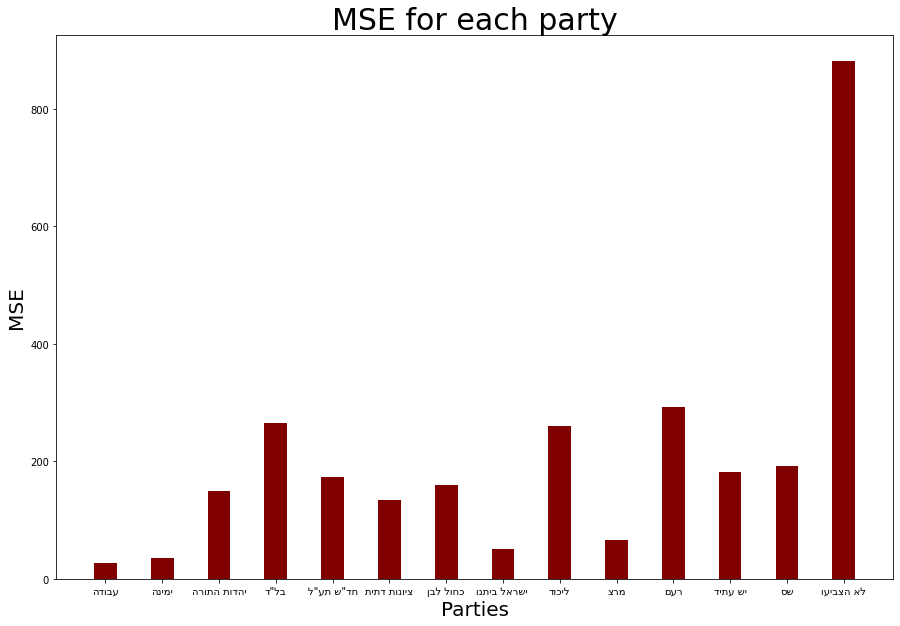

In [ ]:
x = list(N_b.keys())
x = [x.replace('_y', '')[::-1] for x in x]

fig = plt.figure(figsize = (15, 10))

plt.bar(x, mse, color ='maroon', width = 0.4)

plt.xlabel("Parties", fontsize = 20)
plt.ylabel("MSE",fontsize = 20)
plt.title("MSE for each party",fontsize = 30)
plt.show()

As we can see from the bar plot, our model could not predict well the results for the parties:\
'ליכוד','לא הצביעו', 'רעם', יש עתיד', בל"ד'.\
 Due to the fact that this parties has the largest MSE values. 
in general we can see that the largest parties has the highest MSE. 


## b)

In [ ]:
mse_ballots = res_sqr.T.mean(axis = 0)

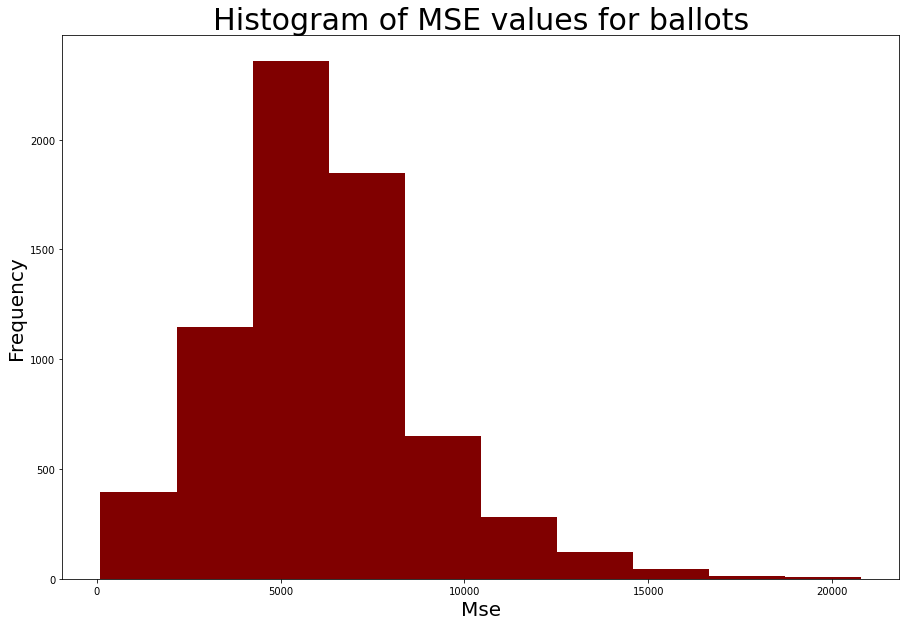

In [ ]:
fig = plt.figure(figsize = (15, 10))

plt.hist(mse_ballots, color = 'maroon')

# Add a title and axis labels
plt.title('Histogram of MSE values for ballots',fontsize = 30)
plt.xlabel('Mse',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)

# Show the plot
plt.show()

In [ ]:
# top 10 ballots

sorted_mse = np.argsort(-mse_ballots)

top_10 = sorted_mse[:10]

# Displaying the top 10 ballots with the highest MSE:

merged_df.iloc[top_10,:2]


,שם ישוב,קלפי
2767,ירושלים,518.1
4502,מגדל שמס,2.0
2772,ירושלים,518.6
6555,קצר אסר,1.0
2486,ירושלים,501.1
2771,ירושלים,518.5
2488,ירושלים,501.3
2487,ירושלים,501.2
6514,כפר קאסם,20.2
6367,תראבין אצאנע שבט,1.0


The table above desplaying the top 10 ballots and it's corresponding cities whith the hughest MSE values.

## Question 4

In [ ]:
label_list1 = ['עבודה', 'ימינה', 'יהדות התורה', 'משותפת', 'ציונות דתית', 'כחול לבן', 'ישראל ביתנו', 'ליכוד', 'מרצ', 'רעם', 'יש עתיד', 'שס', 'תקוה חדשה']

sources = []
targets = []
M_values = list(m_opt.flatten())

sources = [i for i in range(0,13) for j in range(13)]
targets  = [j for i in range(13) for j in range((13),13*2)]

fig = go.Figure(data= [go.Sankey(node = dict(pad = 15, thickness = 20, line= dict(color = "black", width = 0.5), label = label_list1, color = "blue"),
                                  link = dict(source = sources, target = targets, value = M_values))])
node_colors = 2*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown','LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
link_colors = (13//2)*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown', 'LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
fig.update_traces(node_color = node_colors, link_color = link_colors)
fig.update_layout(title_text = "Sankey diagram of M", font_size = 10)
fig.show()

In [ ]:
sources = []
targets = []
M_values = list(np.array(m_opt1).flatten())

sources = [i for i in range(0,13) for j in range(13)]
targets  = [j for i in range(13) for j in range((13),13*2)]

fig = go.Figure(data= [go.Sankey(node = dict(pad = 15, thickness = 20, line= dict(color = "black", width = 0.5), label = label_list1, color = "blue"),
                                  link = dict(source = sources, target = targets, value = M_values))])
node_colors = 2*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown','LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
link_colors = (13//2)*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown', 'LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
fig.update_traces(node_color = node_colors, link_color = link_colors)
fig.update_layout(title_text = "Sankey diagram of M", font_size = 10)
fig.show()

In [ ]:
sources = []
targets = []
M_values = list(np.array(mat_NNLS).flatten())

sources = [i for i in range(0,13) for j in range(13)]
targets  = [j for i in range(13) for j in range((13),13*2)]

fig = go.Figure(data= [go.Sankey(node = dict(pad = 15, thickness = 20, line= dict(color = "black", width = 0.5), label = label_list1, color = "blue"),
                                  link = dict(source = sources, target = targets, value = M_values))])
node_colors = 2*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown','LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
link_colors = (13//2)*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown', 'LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
fig.update_traces(node_color = node_colors, link_color = link_colors)
fig.update_layout(title_text = "Sankey diagram of M", font_size = 10)
fig.show()

In [ ]:
label_list2 = ['עבודה', 'ימינה', 'יהדות התורה', 'משותפת', 'ציונות דתית', 'כחול לבן', 'ישראל ביתנו', 'ליכוד', 'מרצ', 'רעם', 'יש עתיד', 'שס', 'תקוה חדשה', 'לא הצביעו']

sources = []
targets = []
M_values = list(np.array(m_opt2_normed).flatten())

sources = [i for i in range(0,14) for j in range(14)]
targets  = [j for i in range(14) for j in range((14),14*2)]

fig = go.Figure(data= [go.Sankey(node = dict(pad = 15, thickness = 20, line= dict(color = "black", width = 0.5), label = label_list2, color = "blue"),
                                  link = dict(source = sources, target = targets, value = M_values))])
node_colors = 2*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown','LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
link_colors = (13//2)*['Turquoise', 'Linen', 'DarkOliveGreen', 'MistyRose', 'SandyBrown', 'LightGray',
                 'Navy', 'DeepSkyBlue', 'PeachPuff', 'LightSalmon', 'Lime', 'Ivory', 'GreenYellow']
fig.update_traces(node_color = node_colors, link_color = link_colors)
fig.update_layout(title_text = "Sankey diagram of M", font_size = 10)
fig.show()